# My KNN Implementation

    1. Notes for KNN
    2. My implementation from scratch and using library

## 1. Notes for KNN
    A. Main idea
    B. How it works
    C. When to use it?

### A. Main idea 💡



KNN (K-Nearest Neighbors) is a **supervised** Machine Learning algorithm.

Supervised - the algorithm learns from labeled training data, meaning that each sample in the training set has both input features and a known target label. Unlike typical parametric models, KNN does not explicitly build a model with learned weights - instead, it stores the entire training dataset. During prediction, the algorithm compares a new (unseen) sample with the stored training data.

KNN works by calculating the distance between the input sample and all the samples in the training set. After computing these distances, the samples are sorted, and the k closest neighbors are selected. The label of the new sample is then determined based on the majority label (classification) or the average value (regression) of these k neighbors.

### B. How it works ❓


1. **Store the training dataset**  
   KNN keeps all training samples:  

   $$
   D = \{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \dots, (x^{(m)}, y^{(m)})\}
   $$  

   where $x^{(i)} \in \mathbb{R}^n$ (features) and $y^{(i)}$ is the label.

---

2. **Given a new sample $x_{test}$**  
   Compute the distance to each training point.  
   Most common is the **Euclidean distance**:  

   $$
   d(x_{test}, x^{(i)}) = \sqrt{\sum_{j=1}^{n} \left(x_{test}^{(j)} - x^{(i)(j)}\right)^2}
   $$

---

3. **Find the $k$ nearest neighbors**  
   Sort all distances $d(x_{test}, x^{(i)})$ and select the set:  

   $$
   N_k(x_{test}) = \{ k \text{ points with the smallest distance} \}
   $$

---

4. **Make the prediction**  

   - **Classification (majority voting):**  

     $$
     \hat{y} = \text{mode}\{ y^{(i)} : x^{(i)} \in N_k(x_{test}) \}
     $$  

   - **Regression (average value):**  

     $$
     \hat{y} = \frac{1}{k} \sum_{x^{(i)} \in N_k(x_{test})} y^{(i)}
     $$  

---

5. **Return the prediction $\hat{y}$**

---



### C. When to use it? 👀

✅ **When to use KNN:**  
- Works well for **small to medium-sized datasets** (not too many samples).  
- Useful when the **decision boundary is non-linear**.  
- Good for simple tasks.
- Can be applied to both **classification** and **regression** tasks. 

⚠️ **What to watch out for:**  
- **High computational cost** for large datasets (must compare to all points).  
- **Choice of k** is crucial:  
  - Too small → sensitive to noise (overfitting).  
  - Too large → oversmoothing (underfitting).   
- Sensitive to **irrelevant or redundant features** (can distort distances).  
- Memory-intensive since the **entire dataset must be stored**.  
- Struggles with **high-dimensional data** (curse of dimensionality).  

Curse of dimensionality -> In high dimensions, distance tend to loose importance because the difference between the nearest and farthest points becomes very small.

🔑 **Summary:**  
KNN is simple and intuitive, but best suited for **low-dimensional, clean, and relatively small datasets**. Always normalize features and carefully tune **k**.

## 2. My implementation from scratch and using library

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from Plotting_data import PlottingData
from KNN_from_scratch import KNN_Algorithm
import numpy as np

In [2]:
# Preparing dataset
iris = datasets.load_iris()
k = 7
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=123)

In [3]:
# KNN Model - from scratch
clf_scratch = KNN_Algorithm(X_train, y_train, k)
clf_scratch.fit(X_train, y_train)

np.int64(1)

Our chosen X: [4.4 3.2 1.3 0.2]
Prediction: 0
Real class: 0


c:\Users\wikto\OneDrive\Dokumenty\ML\KNN_Algorithm_Iris_Dataset\Plotting_data.py:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axis[i,j].scatter(self.X[:,idx_feature], self.y, c=colors, s=8.5,


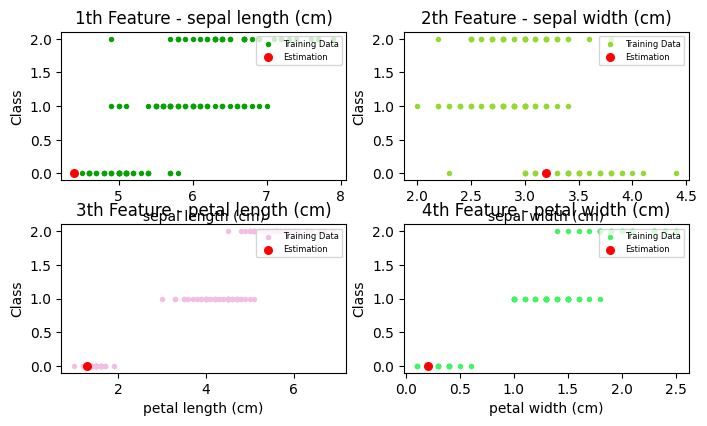

Accuracy: 0.90


In [4]:
# Visualizing Data
figure, axis = plt.subplots(2, 2, figsize=(7,4))
graph = PlottingData(X_train, y_train, iris, axis)
figure.tight_layout()

# Predecting 
idx_ = np.random.choice(X_test.shape[0])
pred = clf_scratch.prediction(X_test[idx_])

print(f'Our chosen X: {X_test[idx_]}')
print(f'Prediction: {pred}')
print(f'Real class: {y_test[idx_]}')

graph.Plotting_Function(X_test[idx_], pred, iris, axis)

plt.show()

# Testing Accuracy on KNN from scratch
correct_array = []
for i in range(len(X_test)):
    idx = np.random.choice(X_test.shape[0], replace=False)
    pred = clf_scratch.prediction(X_test[idx])
    if pred == y_test[idx]:
        correct_array.append(pred)

acc = len(correct_array)/len(y_test)
print(f"Accuracy: {acc:.2f}")



In [5]:
# Scikit-Learn
neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(X_train,y_train)
X_test_pred = X_test.reshape(1,-1)